### operations of one consumer



In [3]:
import os
directory=os.getcwd()
print(directory)


/Users/kultiginbozdemir/Documents/GitHub/vytal/angelo


In [4]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [5]:
# Import customer list
u_df=pd.read_csv('./Users_sanitized.csv', sep=',', index_col='UserId').drop('Unnamed: 0',axis=1)
u_df.head()

,CreationTimestamp,ClaimType,IsOfflineUser
UserId,,,
c80419f9-49c8-40fc-9235-a00e11535441,2020-10-28 11:16:26.078405+00,storeappuser,False
79f8cb9f-845a-435d-a90f-2c4e1c6b184d,2020-07-02 11:02:15.328493+00,consumer,False
885f9e83-82a7-4b27-9c77-c0efa2d37717,2020-09-14 13:17:28.633744+00,consumer,False
4c9e5562-40d5-4b2d-bdcb-997fae59fcb5,2021-04-02 13:47:46.115381+00,consumer,False
8fc09966-88e1-45d5-a1ac-b923e37ea3a1,2020-01-04 22:09:01.160486+00,consumer,False


In [6]:
# Import merchants
m_df=gpd.read_file('./co_store_delta.json', index_col='Id')
m_df.index=m_df.Id
m_df.head(2)

,Id,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,StreetAddress,City,SellsOfflineCards,check_ins,check_outs,delta,cater_in,cater_out,cater_delta,cater_out_ratio,geometry
Id,,,,,,,,,,,,,,,,,,
37750976-cd54-44a5-a05a-d85d3cc9035b,37750976-cd54-44a5-a05a-d85d3cc9035b,2c1b374d-3d05-4b74-a260-a479c8ef9232,Krua Thai 2 - Heumarkt,6.960161,50.935471,2020-10-20T18:04:31.643000+00:00,2,Heumarkt 25,Köln,False,3721.0,-4492.0,-771.0,6.0,0.0,6.0,-0.0,POINT (6.96016 50.93547)
d4e38d94-eb54-4049-b721-4da7c79f3891,d4e38d94-eb54-4049-b721-4da7c79f3891,2c9fdbe4-3e32-4916-ba19-147258d0dd1d,Fenster zum Hof,6.944754,50.948689,2019-09-22T19:53:24.931000+00:00,2,Im Mediapark 5,Köln,False,60.0,-46.0,14.0,0.0,0.0,0.0,-0.0,POINT (6.94475 50.94869)


In [9]:
import pytz

# define the old and new timezones
old_timezone = pytz.timezone("UTC")
berlin = pytz.timezone("Europe/Berlin")

In [10]:
# Choose the time window for the analysis

begin_date=dt.datetime(2019, 8, 1, 0, 0, 0, tzinfo=berlin)
end_date=dt.datetime(2021, 8, 31, 23, 59, 0, tzinfo=berlin)



In [31]:

# read csv
#out_df=pd.read_csv('./c_co_out.csv', sep=',', low_memory=False).drop(drop_list, axis=1).rename(columns={'TypeId':'ContainerTypeId'})
#out_df.head(2)

#out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince'],errors='coerce',utc=True).dt.tz_convert(tz='Europe/Berlin')
#out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill'],errors='coerce',utc=True).dt.tz_convert(tz='Europe/Berlin')

%store -r c_co_out



begin_=c_co_out['OwnerSince']>begin_date
end_=c_co_out['OwnerSince']<end_date

consumer_out=c_co_out[begin_ & end_]



#select a user to be analyzed
selected_consumer=list(out_df.groupby(by='NextOwnerId').size().sort_values(ascending=False).head(200).tail(1).index)[0]
selected_consumer


select_consumer_=consumer_out['NextOwnerId']==selected_consumer

consumer_out=consumer_out[select_consumer_]

consumer_out.head(2)

,OwnerId,NextOwnerId,ContainerId,OwnerSince,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,OwnerSince_r,temp_,Source,Target
31405,e4b82739-fa38-4381-821f-a765cedd9e89,0b0801bc-b230-4be6-98c9-de8790ff0dca,d32c0fdc-cc71-41df-9153-fd4ba694e1d6,2020-10-28 13:03:27.401769+01:00,2020-10-28 13:03:27.401769+01:00,True,NaN,1.0,31b66f50-de83-4551-b8d9-58fb5c74680e,NaN,False,False,storeappuser,consumer,POINT (2567577.078 5646951.354),2020-10-28 13:00:00+01:00,14.8,31b66f50-de83-4551-b8d9-58fb5c74680e,0b0801bc-b230-4be6-98c9-de8790ff0dca
31987,e4b82739-fa38-4381-821f-a765cedd9e89,0b0801bc-b230-4be6-98c9-de8790ff0dca,29860860-bd53-4978-ace8-d36fbbb34598,2020-10-29 13:59:49.542746+01:00,2020-10-29 13:59:49.542746+01:00,True,NaN,1.0,31b66f50-de83-4551-b8d9-58fb5c74680e,NaN,False,False,storeappuser,consumer,POINT (2567577.078 5646951.354),2020-10-29 14:00:00+01:00,12.5,31b66f50-de83-4551-b8d9-58fb5c74680e,0b0801bc-b230-4be6-98c9-de8790ff0dca


In [32]:
set(list(out_df['next_owner_claim_type'])), set(list(consumer_out['owner_claim_type'])), set(list(consumer_out['container_type_id']))

({'consumer'}, {'storeappuser'}, {1.0})

In [33]:
%store -r c_co_in


begin_=c_co_in['OwnerTill']>begin_date
end_=c_co_in['OwnerTill']<end_date

consumer_in=c_co_in[begin_ & end_]

consumer_in=consumer_in[consumer_in['OwnerId']==selected_consumer]
#del in_df
consumer_in.head(2)

,OwnerId,NextOwnerId,ContainerId,OwnerSince,OwnerTill,IsBillableTransaction,TransactionId,container_type_id,owner_store_id,next_owner_store_id,owner_co_int_,next_owner_co_int_,owner_claim_type,next_owner_claim_type,geometry,OwnerTill_r,temp_,Source,Target
213562,0b0801bc-b230-4be6-98c9-de8790ff0dca,e4b82739-fa38-4381-821f-a765cedd9e89,d32c0fdc-cc71-41df-9153-fd4ba694e1d6,2020-10-28 13:03:27.401769+01:00,2020-10-29 13:59:32.057904+01:00,False,cdf811cc-3d58-415d-a3bb-9107c6a08be1,1.0,NaN,31b66f50-de83-4551-b8d9-58fb5c74680e,False,False,consumer,storeappuser,POINT (2567577.078 5646951.354),2020-10-29 14:00:00+01:00,12.5,0b0801bc-b230-4be6-98c9-de8790ff0dca,31b66f50-de83-4551-b8d9-58fb5c74680e
213569,0b0801bc-b230-4be6-98c9-de8790ff0dca,e4b82739-fa38-4381-821f-a765cedd9e89,29860860-bd53-4978-ace8-d36fbbb34598,2020-10-29 13:59:49.542746+01:00,2020-11-02 13:40:46.995328+01:00,False,1e3cba86-38bd-4ba1-9f50-57ca0605ab88,1.0,NaN,31b66f50-de83-4551-b8d9-58fb5c74680e,False,False,consumer,storeappuser,POINT (2567577.078 5646951.354),2020-11-02 14:00:00+01:00,20.7,0b0801bc-b230-4be6-98c9-de8790ff0dca,31b66f50-de83-4551-b8d9-58fb5c74680e


In [34]:
min(consumer_in['OwnerTill'])

Timestamp('2020-10-29 13:59:32.057904+0100', tz='Europe/Berlin')

In [35]:
max(consumer_in['OwnerTill'])

Timestamp('2021-08-31 13:19:06.647084+0200', tz='Europe/Berlin')

## Consumer's behaviour.
 .... 

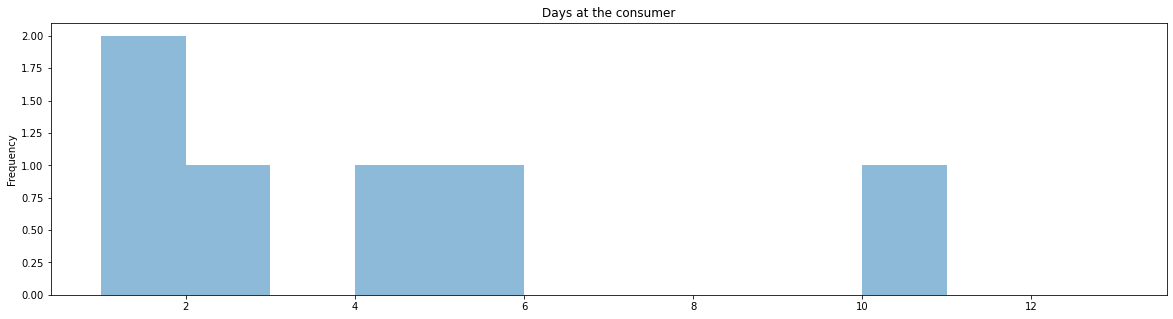

In [47]:
# plt how long containers stay at the consumer in days
# 
# 
plt.figure(figsize=(20,5))
plt.title('Days at the consumer')
plt.ylabel('Frequency')

#plt.hist((consumer_in['OwnerTill']-consumer_in['OwnerSince']).dt.total_seconds()/(60*60*24), alpha=0.5,bins=list(range(1,14))) # convert to days
plt.hist((consumer_out['OwnerTill']-consumer_out['OwnerSince']).dt.total_seconds()/(60*60*24), alpha=0.5,bins=list(range(1,14))) # convert to days

plt.show()

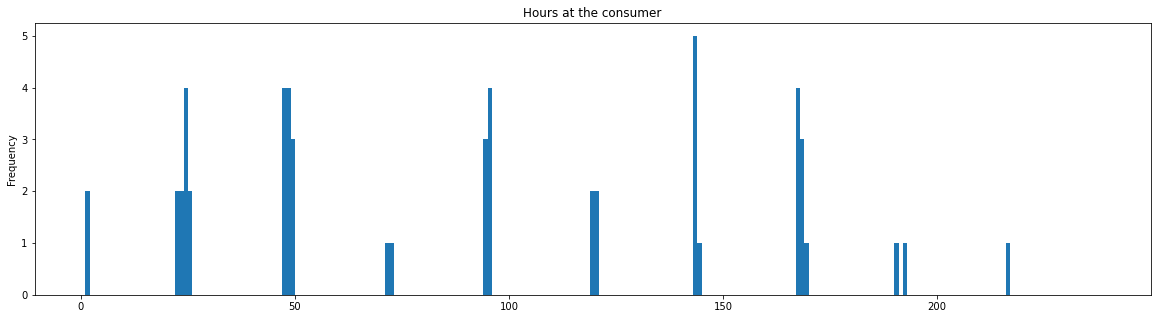

In [48]:
# plt how long containers stay at the consumer in hours
# 
# 
plt.figure(figsize=(20,5))
plt.title('Hours at the consumer')
plt.ylabel('Frequency')

plt.hist((consumer_in['OwnerTill']-consumer_in['OwnerSince']).dt.total_seconds()/(60*60), bins=list(range(1,239))) # convert to days
plt.show()

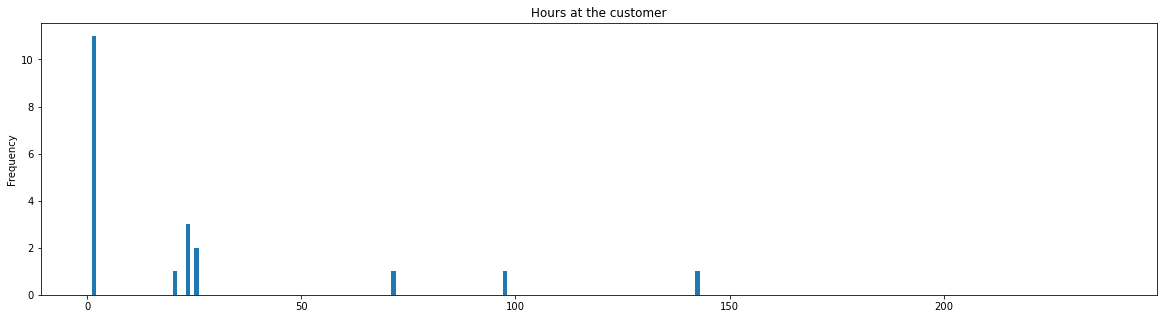

In [49]:
# plt shows how long (hours) containers stay with consumer from consumer_out data.
#

plt.figure(figsize=(20,5))
plt.title('Hours at the customer')
plt.ylabel('Frequency')

plt.hist((consumer_out['OwnerTill']-consumer_out['OwnerSince']).dt.total_seconds()/(60*60), bins=list(range(1,239))) # convert to hours 
plt.show()


In [50]:
#consumer_in and consumer_out duration at the one consumer are similar, but not same. 

In [51]:
consumer_out['OwnerSince'].dtype

datetime64[ns, Europe/Berlin]

## Time Series

### Hourly

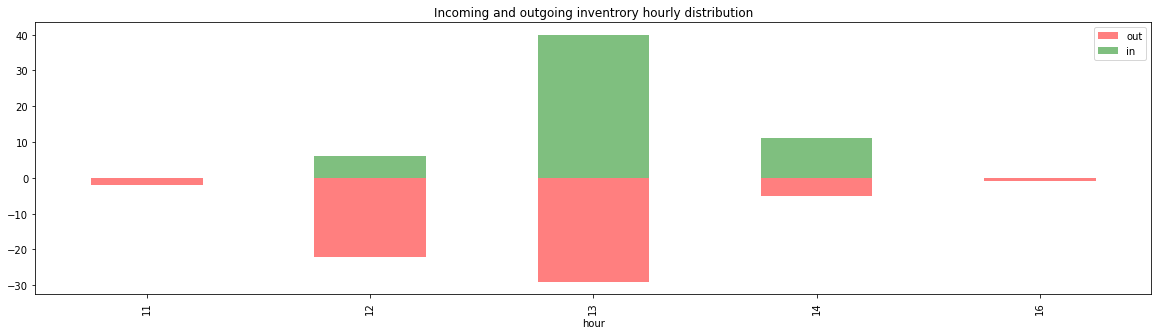

In [52]:
# create a new df after grouping by days.

ops_day=consumer_out.groupby(consumer_out['OwnerSince'].dt.hour).size()*(-1) # going out containers

ops_day=pd.DataFrame(ops_day, columns=['out'])
ops_day.index.names=['hour']

ops_day['in']=consumer_in.groupby(consumer_in['OwnerTill'].dt.hour).size()

ops_day=ops_day.fillna(0)
ops_day['sum']=ops_day['out']+ops_day['in']

#ops_day.head()

plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory hourly distribution')
ops_day['out'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_day['in'].plot.bar(color='green', legend=True, alpha=0.5)

#ops_day['sum'].plot.bar(color='blue', legend=True)

plt.show()

### Daily

In [53]:
# create a new df after grouping by days.

ops_day=consumer_out.groupby(consumer_out['OwnerSince'].dt.date).size()*(-1) # going out containers

ops_day=pd.DataFrame(ops_day, columns=['out'])
ops_day.index.names=['Date']

ops_day['in']=consumer_in.groupby(consumer_in['OwnerTill'].dt.date).size()

ops_day=ops_day.fillna(0)
ops_day['sum']=ops_day['out']+ops_day['in']

ops_day.head(2)

,out,in,sum
Date,,,
2020-10-28,-1,0.0,-1.0
2020-10-29,-1,1.0,0.0


In [54]:
bins=pd.date_range(start=pd.to_datetime(ops_day.index).min(), end=pd.to_datetime(ops_day.index).max())
bins=pd.to_datetime(bins)
bins=pd.Series(bins).dt.date
bins=pd.DataFrame(bins, columns=['date'])
bins.head(2)

,date
0,2020-10-28
1,2020-10-29


In [55]:

ops_day['date']=pd.to_datetime(ops_day.index)
ops_day['date']=ops_day['date'].dt.date
ops_day.index=ops_day['date']

In [56]:
ops_day=pd.merge(bins,ops_day, how='left', left_on=bins['date'], \
                 right_index=True).fillna(0).drop('date_y', axis=1).rename(columns={'date_x':'date'}).set_index('date')

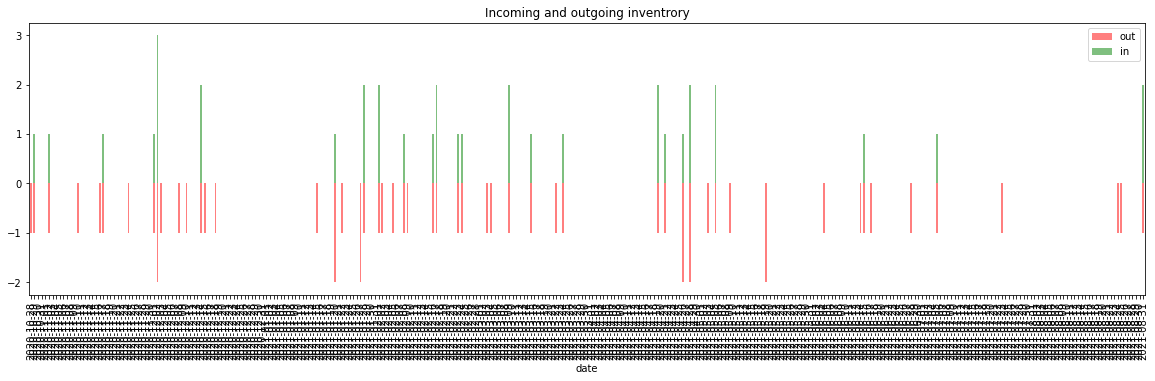

In [81]:


plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory')
ops_day['out'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_day['in'].plot.bar(color='green', legend=True, alpha=0.5)

plt.yticks()
plt.show()

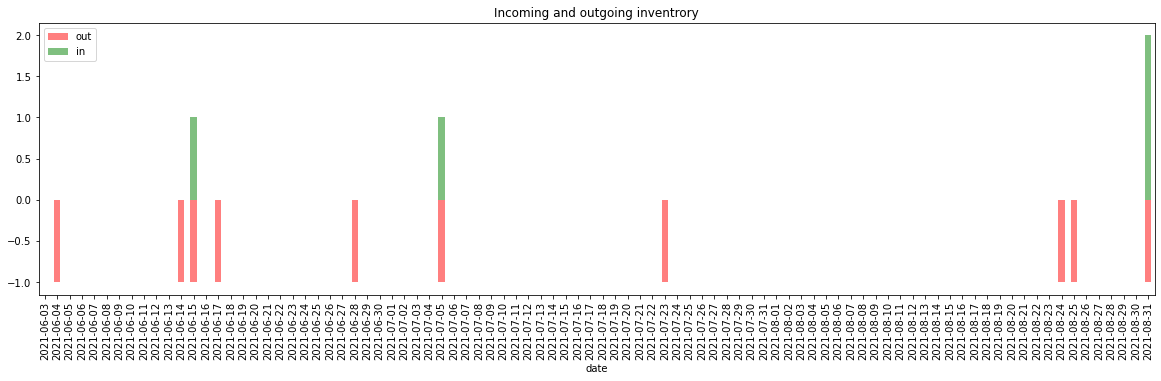

In [82]:

# last 90 days
plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory')
ops_day['out'].tail(90).plot.bar(color='Red', legend=True,  alpha=0.5)
ops_day['in'].tail(90).plot.bar(color='green', legend=True, alpha=0.5)


plt.show()

### Weekly

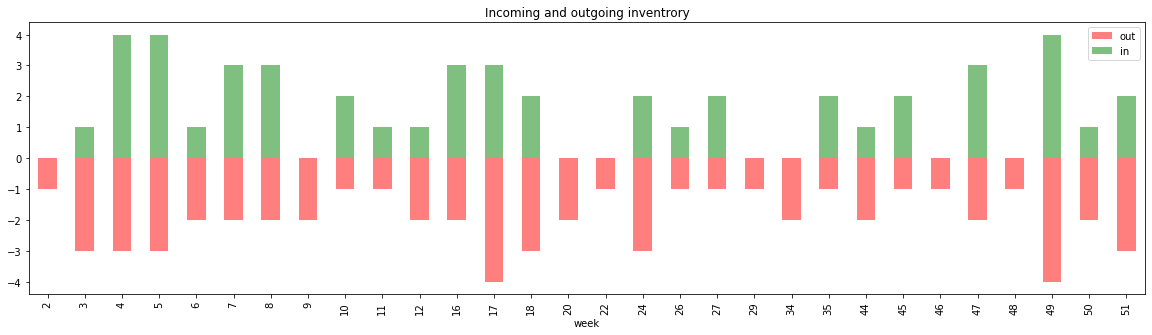

In [59]:
# create a new df after grouping by week.

ops_week=(consumer_out.groupby(consumer_out['OwnerSince'].dt.isocalendar().week).size()*(-1)).to_frame(name='out')#.index.names=['Date'] # going out containers
#
ops_week['in']=consumer_in.groupby(consumer_in['OwnerTill'].dt.isocalendar().week).size()
ops_week=ops_week.fillna(0)
ops_week['sum']=ops_week['out']+ops_week['in']
#ops_week.head()



plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory')
ops_week['out'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_week['in'].plot.bar(color='green', legend=True, alpha=0.5)



plt.show()

#plt.figure(figsize=(20, 5))
#plt.title('Sum of inventory')

#ops_week['sum'].plot.bar(color='blue', legend=True)

#plt.show()

### Weekday

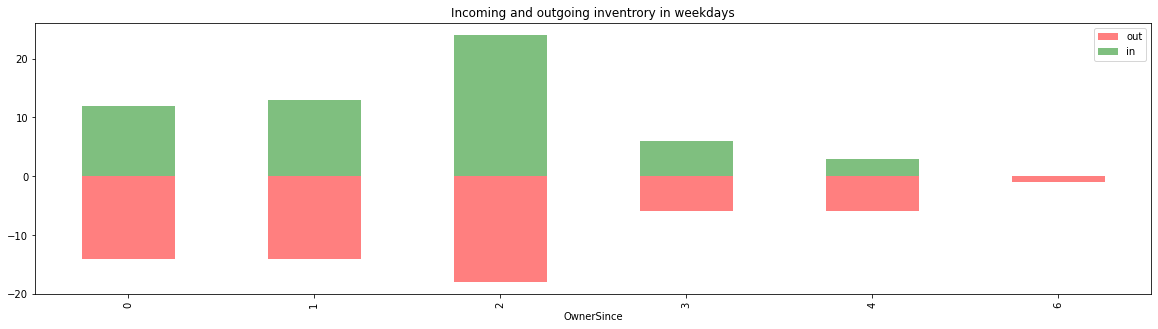

In [80]:
# create a new df after grouping by week.

ops_month=(consumer_out.groupby(consumer_out['OwnerSince'].dt.weekday).size()*(-1)).to_frame(name='out')#.index.names=['Date'] # going out containers
#
ops_month['in']=consumer_in.groupby(consumer_in['OwnerTill'].dt.weekday).size()
ops_month=ops_month.fillna(0)
ops_month['sum']=ops_month['out']+ops_month['in']


plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory in weekdays')
ops_month['out'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_month['in'].plot.bar(color='green', legend=True, alpha=0.5)


plt.show()

### Daily Analysis Continued

<function matplotlib.pyplot.show(close=None, block=None)>

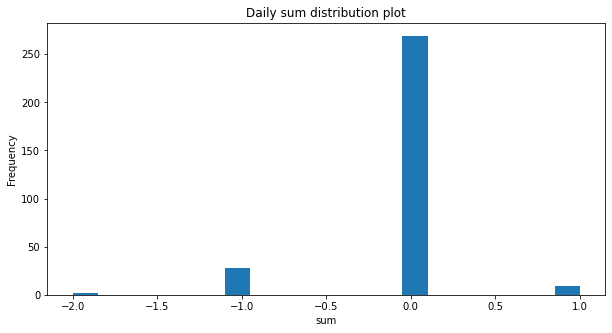

In [61]:
# Daily marginal change distribution 
plt.figure(figsize=(10,5))
ops_day['sum'].plot.hist(bins=20)
plt.title('Daily sum distribution plot')
plt.xlabel('sum')
plt.show

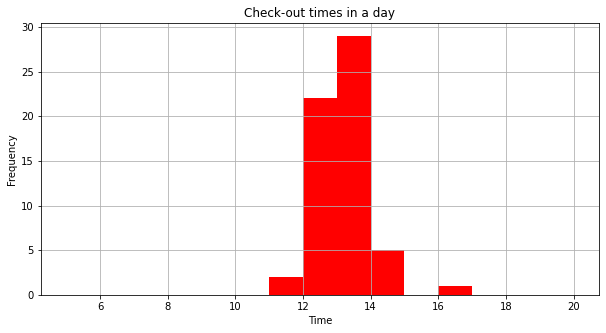

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Check-out times in a day')
plt.ylabel('Frequency')
plt.xlabel('Time')
consumer_out['OwnerSince'].dt.hour.hist(bins=range(5,21), color='red') # checkout times in a day
plt.show()

<AxesSubplot:title={'center':'Check-in times in a day'}, xlabel='Time', ylabel='Frequency'>

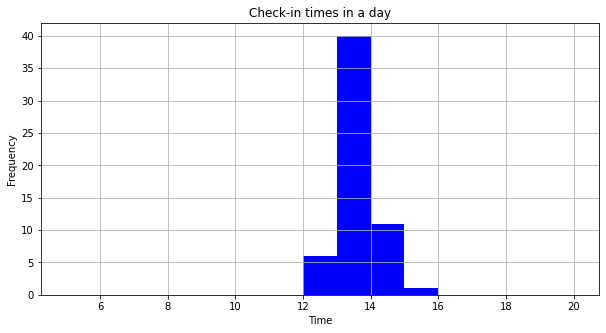

In [63]:
plt.figure(figsize=(10, 5))
plt.title('Check-in times in a day')
plt.ylabel('Frequency')
plt.xlabel('Time')
consumer_in['OwnerTill'].dt.hour.hist(bins=range(5,21), color='blue') # checkins time in a day

## Time Series 

In [64]:
#ops_out = ops_out[ops_out['ds'].dt.dayofweek < 5] # to exclude weekends
# prepare expected column names
consumer_out['OwnerSince']=consumer_out['OwnerSince'].apply(lambda x: x.replace(tzinfo=None))


ops_out=consumer_out.groupby(by=consumer_out['OwnerSince']).size().to_frame('count')

ops_out['y']= ops_out['count']
ops_out['ds']= pd.Series()
ops_out['ds']=pd.to_datetime(ops_out.index)

ops_out.tail().ds.dt.date

/var/folders/bs/8_rscwxd25z1bcq4d89vsz380000gn/T/ipykernel_30001/2773161885.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ops_out['ds']= pd.Series()


OwnerSince
2021-07-05 13:24:33.952859    2021-07-05
2021-07-23 12:25:51.744618    2021-07-23
2021-08-24 12:28:24.469053    2021-08-24
2021-08-25 16:43:32.901105    2021-08-25
2021-08-31 11:57:07.282119    2021-08-31
Name: ds, dtype: object

In [65]:
ops_out['date']=ops_out.index
ops_out.head(2)

,count,y,ds,date
OwnerSince,,,,
2020-10-28 13:03:27.401769,1,1,2020-10-28 13:03:27.401769,2020-10-28 13:03:27.401769
2020-10-29 13:59:49.542746,1,1,2020-10-29 13:59:49.542746,2020-10-29 13:59:49.542746


In [66]:
# Choose the time window for the analysis

forecast_date=dt.datetime(2021, 7, 1, 0, 0, 0, tzinfo=None)
forecast_date

datetime.datetime(2021, 7, 1, 0, 0)

In [67]:
# create test dataset, remove last.. days
train = ops_out[ops_out.date<forecast_date]
future=ops_out[ops_out.date>=forecast_date]
train.tail()

,count,y,ds,date
OwnerSince,,,,
2021-06-04 14:59:57.470304,1,1,2021-06-04 14:59:57.470304,2021-06-04 14:59:57.470304
2021-06-14 12:31:34.908304,1,1,2021-06-14 12:31:34.908304,2021-06-14 12:31:34.908304
2021-06-15 12:41:52.908638,1,1,2021-06-15 12:41:52.908638,2021-06-15 12:41:52.908638
2021-06-17 12:51:07.371804,1,1,2021-06-17 12:51:07.371804,2021-06-17 12:51:07.371804
2021-06-28 13:39:33.408603,1,1,2021-06-28 13:39:33.408603,2021-06-28 13:39:33.408603


In [68]:
future.head()

,count,y,ds,date
OwnerSince,,,,
2021-07-05 13:24:33.952859,1,1,2021-07-05 13:24:33.952859,2021-07-05 13:24:33.952859
2021-07-23 12:25:51.744618,1,1,2021-07-23 12:25:51.744618,2021-07-23 12:25:51.744618
2021-08-24 12:28:24.469053,1,1,2021-08-24 12:28:24.469053,2021-08-24 12:28:24.469053
2021-08-25 16:43:32.901105,1,1,2021-08-25 16:43:32.901105,2021-08-25 16:43:32.901105
2021-08-31 11:57:07.282119,1,1,2021-08-31 11:57:07.282119,2021-08-31 11:57:07.282119


/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -135.489
Iteration  1. Log joint probability =    35.5069. Improved by 170.996.
Iteration  2. Log joint probability =    88.6956. Improved by 53.1888.
Iteration  3. Log joint probability =    106.326. Improved by 17.6309.
Iteration  4. Log joint probability =    107.341. Improved by 1.0148.
Iteration  5. Log joint probability =    107.467. Improved by 0.125297.
Iteration  6. Log joint probability =    107.572. Improved by 0.105754.
Iteration  7. Log joint probability =    107.589. Improved by 0.0162944.
Iteration  8. Log joint probability =    107.607. Improved by 0.0182661.
Iteration  9. Log joint probability =    107.617. Improved by 0.0104695.
Iteration 10. Log joint probability =    107.622. Improved by 0.00433291.
Iteration 11. Log joint probability =    107.622. Improved by 0.000103944.
Iteration 12. Log joint probability =    107.625. Improved by 0.00279622.
Iteration 13. Log joint probability =    107.625. Improved by 0.000695696.
Iteration 14. 

/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


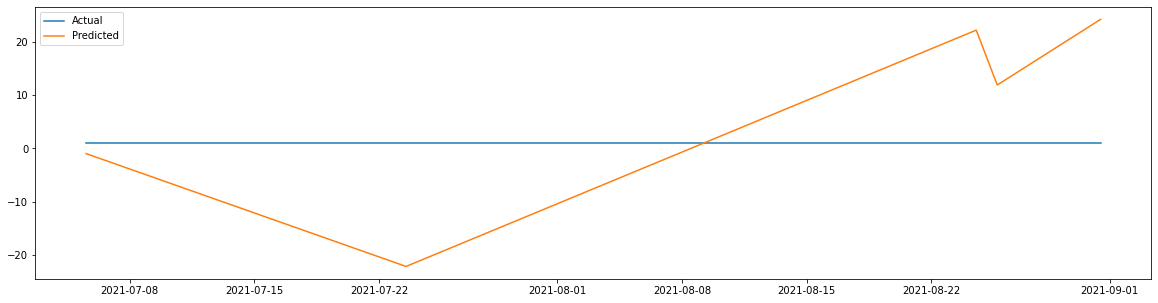

In [69]:


# define the model
model = Prophet(yearly_seasonality=True,daily_seasonality=True, weekly_seasonality=True).add_country_holidays(country_name='DE')
                
# fit the model
model.fit(train)


# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = future['y']
y_pred = forecast['yhat']

#mae = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)
# plot expected vs actual
plt.figure(figsize=(20, 5))
plt.plot(future.index,future['y'], label='Actual')
plt.plot(forecast.ds,forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

Autocorrelation, or partial autocorrelation <br>
Granger casuality test to predit the return times from check-out times <br>
logistic regression <br>

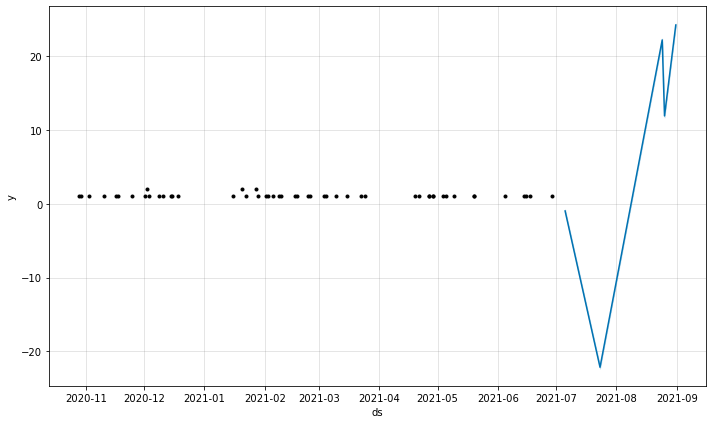

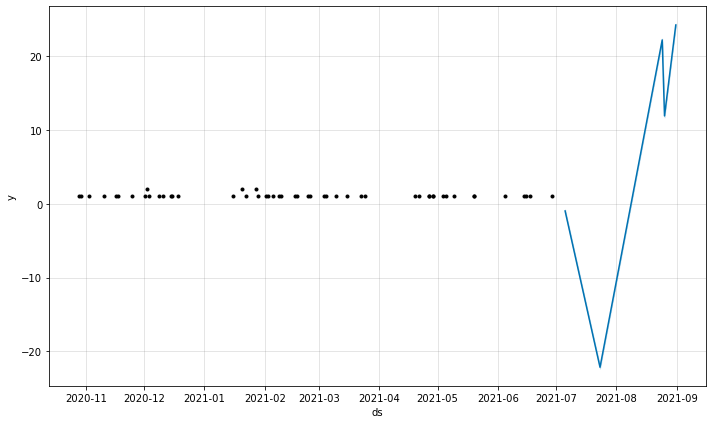

In [70]:
model.plot(forecast)


/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/kultiginbozdemir/opt/anaconda3/envs/vytal/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


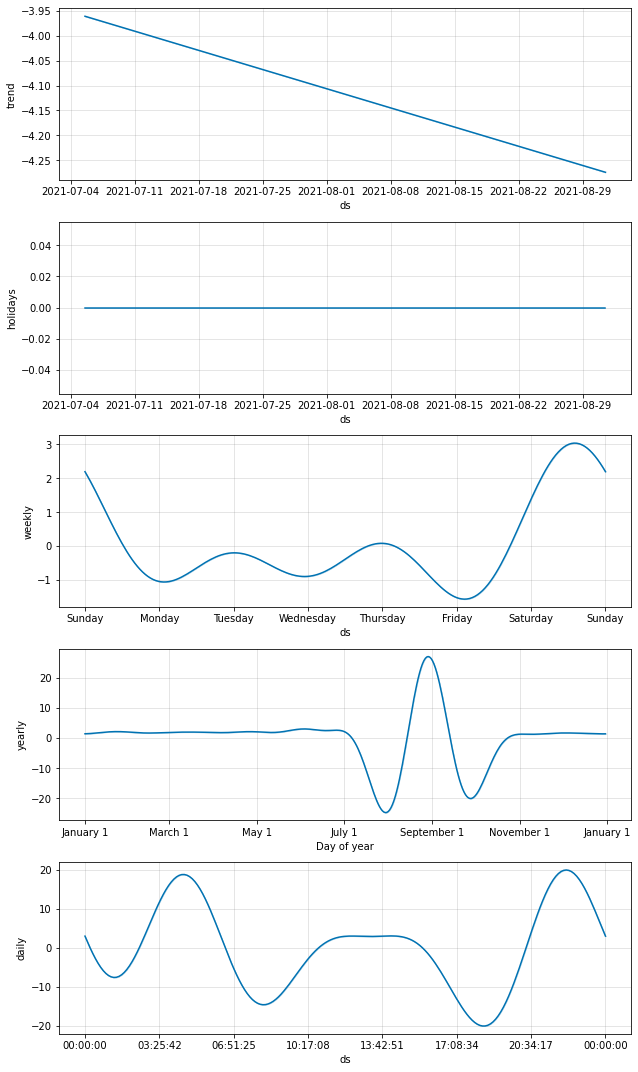

In [71]:
fig2=(model.plot_components(forecast))